# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or type of vectors will show up as ICA dimensions.

Answer: PCA will show different correlations between items bought. The first dimension may say shoppers buy mainly one item and nothing else. And the second dimension might show buying groups of items and nothing else.

ICA will show trade offs between shoppers buying item 1 and not item 2, such that if a shopper buys item 2, they wont get item 1.

###PCA

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA

pca = PCA(n_components = data.shape[1])
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: After the first two groups, there is a very large drop. After that, there is a more steady drop.

I would choose 4. The first two groups are large enough to automatically include, and an additional two groups will capture the rest. 4 dimensions captures about 97% variance which seems high enough since we don't want to increase the dimensions too much, due to the curse of dimensionality.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The dimensions seem to represent different correlations between items bought.

The first one [-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471] is someone who buys a lot of "Fresh". We could use this information to create an incentive to buy items not commonly purchased. Such as, buy "Fresh" and recieve a discount on "Detergents_Paper". We could also increase the price of the "Fresh" since it's high in demand.

The second one [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921] is someone who buys a lot of "Milk" and "Grocery" and a bit of "Detergents_Paper". This tells us we should buy these three items together, but more "Grocery" than "Detergents_Paper".

The third one [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747] buys "milk" and "frozen". Same advice as above.

###ICA

[[ 0.03349093 -0.17010275 -1.11680419  0.08908118  1.15131334  0.27470505]
 [-0.04334463 -0.01612397 -0.05567124 -0.03176554  0.0208026   0.86734557]
 [ 0.02354237 -0.13809602  0.59968365  0.02472737 -0.03645177 -0.07055503]
 [ 0.09702365  0.0103289  -0.07180229 -0.67818102  0.02261901  0.28534266]
 [-0.01725562 -0.72298675  0.53934345  0.02210125 -0.13576917  0.2903145 ]
 [ 0.44590403 -0.06317793 -0.05851318 -0.04118495  0.0847063  -0.04985377]]
1.63897190893
0.871187785792
0.621420485666
0.746014336474
0.957655052952
0.466478729129


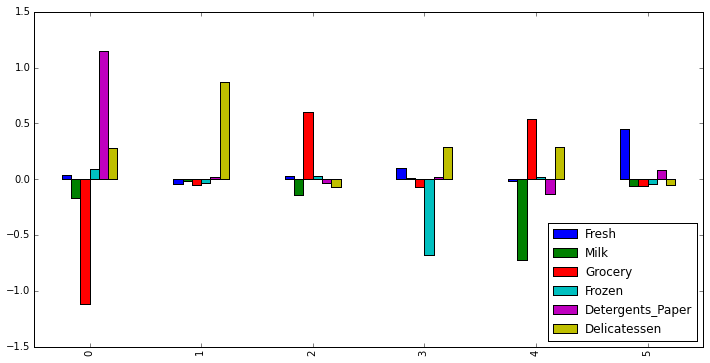

In [6]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import MinMaxScaler

ica = FastICA(n_components = data.shape[1], random_state = 1)
ica_data = MinMaxScaler().fit_transform(data.astype(float))
ica.fit(ica_data)

# Print the independent components
print ica.components_

#Extra anaylsis of magnitude of vectors
for vec in ica.components_:
    print np.linalg.norm(vec)
    
pd.DataFrame(ica.components_, columns = data.columns).plot(kind = 'bar', figsize = (12, 6))

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer:

[ 0.03349093 -0.17010275 -1.11680419  0.08908118  1.15131334  0.27470505] : 1.64

Someone who buys a lot of "Detergents_Paper" but at the cost of not buying "grocery". This could be a dollar store vs a grocery store.

------

[-0.04334463 -0.01612397 -0.05567124 -0.03176554  0.0208026   0.86734557] : 0.87

Someone who buys a lot of "Delicatessen". This could be a Deli.

-------

[ 0.02354237 -0.13809602  0.59968365  0.02472737 -0.03645177 -0.07055503] : 0.62

Someone who buys a lot "grocery". This could be a grocery store.

-------

[ 0.09702365  0.0103289  -0.07180229 -0.67818102  0.02261901  0.28534266] : 0.75

Someone who buys "Delicatessen" at the cost of a lot of "frozen". This could be a fancy bakery vs. a grocery store.

-------

[-0.01725562 -0.72298675  0.53934345  0.02210125 -0.13576917  0.2903145 ] : 0.96
 
Someone who buys "grocery" and "delicatessen" at the cost of "milk". This could be a deli vs a a convience store.

-------

[ 0.44590403 -0.06317793 -0.05851318 -0.04118495  0.0847063  -0.04985377] : 0.47

Someone who buys a lot of "fresh". This could be a farmer's market.
 
-------

These components could be used to say how much of each item to stock on the shelves. For example in the first case, we see that Detergents_Paper is inversly proportional to Grocery. Therefore, if it costs less to stock Detergents_Paper (since they last longer), it may make sense to convert some of the Grocery section into Detregents_Paper.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer:

KMeans
--

-Easy to implement and understand.

-Runs fast and doesnt cost much.

-Scales well.

Gaussian Mixture Models
---

-Nature prefers gaussian distributions.

-Takes into account variance as well as means.

-Creates/Draws ellipsoids instead of polygons

-"Agnostic:	as this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply." Scikit Learn, 2.1 Gaussian mixture models: http://scikit-learn.org/stable/modules/mixture.html

Choice
---
I would choose to use the GMM for mainly because this is what Nature prefers and having ellipsoids will better describe the kind of groups appearing. I will probably choose 4 clusters since that was my predication in question 3.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [4]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [5]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components = 2).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [7]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

#clusters = KMeans(n_clusters=4)
clusters3 = GMM(n_components=3)
clusters3.fit(reduced_data)

print clusters3

clusters4 = GMM(n_components=4)
clusters4.fit(reduced_data)

print clusters4

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


In [10]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z3 = clusters3.predict(np.c_[xx.ravel(), yy.ravel()])
Z4 = clusters4.predict(np.c_[xx.ravel(), yy.ravel()])

In [21]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

#centroids = clusters.cluster_centers_
centroids3 = clusters3.means_
print centroids3

centroids4 = clusters4.means_
print centroids4

[[   269.05318679  -6506.88683442]
 [-17879.18623839  10122.79246625]
 [  6987.95079141   4249.82914044]]
[[  7181.91424431   5413.62958366]
 [  2344.28951027  -6730.90263321]
 [-15238.03405438  -3342.05080154]
 [ -9421.64737924  34508.91379789]]


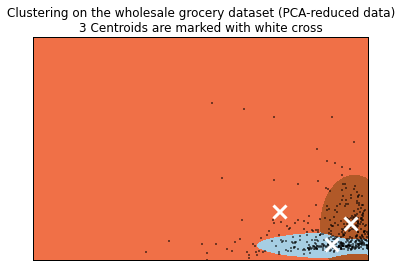

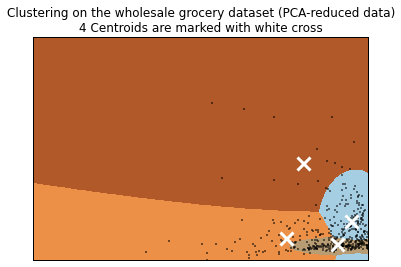

In [22]:
# Put the result into a color plot
# 3 centriods
Z3 = Z3.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z3, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids3[:, 0], centroids3[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          '3 Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# 4 centriods
Z4 = Z4.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z4, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids4[:, 0], centroids4[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          '4 Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer:
**4 centroids, last graph** I choose 4 instead of 3 because there seemed to be an additional cluster at the bottom.

In this case the brown centroid [2344.28951027  -6730.90263321] would probably the group of shoppers who buy a lot of "fresh" (first group of question 3 PCA).

The blue centroid [7181.91424431   5413.62958366] would be the group that buys "Milk" and "Grocery" (second group).

The orange centroid [-15238.03405438  -3342.05080154] would be "milk" and "frozen" (third group).

The red centroid [-9421.64737924  34508.91379789] would be everyone else.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: I prefered the PCA analysis, because of it's simplicity but extensive results. It quickly shows that there are two large groups which should be focused on, and describes their buying habits. It also shows that the everything else counts for 15% of the business and shouldn't be ignored either.

Whereas, I feel the plots lose too much information on what is actually being bought (2 dimensions is too low)

**9)** How would you use that technique to help the company design new experiments?

Answer: We could use the PCA results to create an A/B testing. Since the second dimension of PCA shows that people buy "Milk" and "Grocery" together, we could try for one week being normal, then the next week having coupons that have if you buy "Grocery" receive a discount on "Milk". See which week creates more income.

**10)** How would you use that data to help you predict future customer needs?

Answer: We could start labeling incoming data by asking people at the checkouts what they are buying for. ex. business vs home. This would then change the problem into a supervised one. (Note: this is what the wholesale food store close to me does)

Additional statistics could be added, like time of day purchases occur.

If we better knew who is making the purchase, the wholesale food store could better target advertisment (ex. is there enough home interest to have door to door flyers).

If we knew what time of day the purchases where being made at, we could have fresher food delivered at that time.